# AI Development and Productivity Coorelations

### Research Questions
1. How much does AI usage effect the result and efficiency of developemnt: does more AI usage equal less time coding and does more AI usage equal succesful tasks?
2. What are the most impactful aspects during development in a posistive and negative way? 

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np

sns.set_theme()

# DataSet

First we will look at a general view of the data set by loading and viewing the head

In [3]:
ai_dev_df = pd.read_csv('ai_dev_productivity.csv')
ai_dev_df.head(5)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


## Understand the data

#### In this step we will look at the descriptive statistics, clean the data if necessary, and look at outliers

In [4]:
ai_dev_df.shape

(500, 9)

In [5]:
ai_dev_df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


#### Check the number of unqiue values in each column

In [6]:
ai_dev_df.nunique()

hours_coding        353
coffee_intake_mg    244
distractions          9
sleep_hours          67
commits              14
bugs_reported         6
ai_usage_hours      260
cognitive_load       79
task_success          2
dtype: int64

#### N/A column check

In [7]:
ai_dev_df.isna().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

#### Next we look for outliers and how spread out each column is

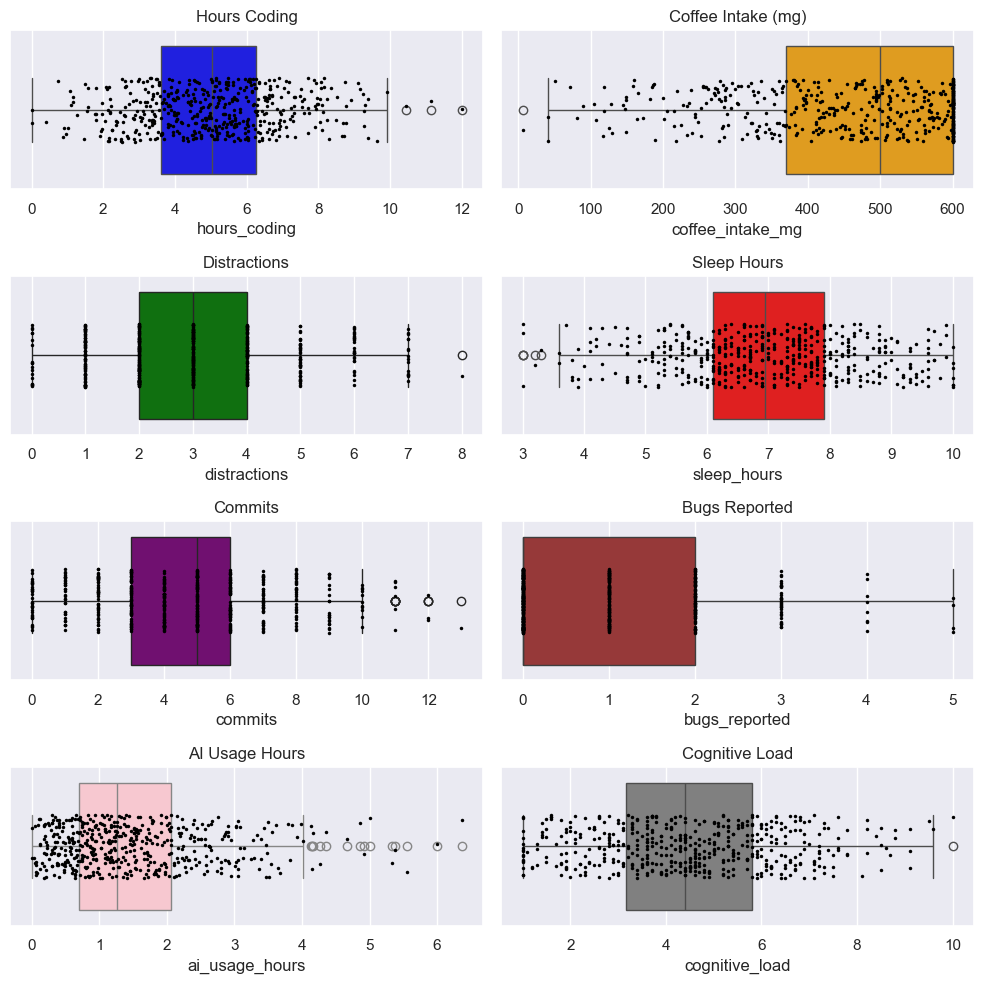

In [8]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(10, 10))
columns = ai_dev_df.columns
columns = columns[:-1] # ignore final column since it is a boolean
titles = ['Hours Coding', 'Coffee Intake (mg)', 'Distractions', 'Sleep Hours', 'Commits', 'Bugs Reported', 'AI Usage Hours', 'Cognitive Load']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey']

for ax, title, column, color in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8], titles, columns, colors):
    plot = sns.boxplot(x=ai_dev_df[column], ax=ax, color=color)
    plot = sns.stripplot(x=column, data=ai_dev_df, ax=ax, color="black", jitter=0.2, size=2.5)
    ax.set_title(title)

plt.tight_layout()

#### Remove Outliers

In [9]:
Q1 = ai_dev_df.quantile(0.25)
Q3 = ai_dev_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

hours_coding          2.6750
coffee_intake_mg    230.5000
distractions          2.0000
sleep_hours           1.8000
commits               3.0000
bugs_reported         2.0000
ai_usage_hours        1.3725
cognitive_load        2.6250
task_success          1.0000
dtype: float64


In [10]:
ai_dev_df = ai_dev_df[~((ai_dev_df < (Q1 - 1.5 * IQR)) | (ai_dev_df > (Q3 + 1.5 * IQR))).any(axis=1)]
ai_dev_df.shape

(470, 9)

#### Rename columns to more readable

In [11]:
ai_dev_df = ai_dev_df.rename(columns={'hours_coding': 'Coding Hours', 'coffee_intake_mg': 'Coffee Intake (mg)', 'distractions': 'Distractions', 'sleep_hours': 'Sleep Hours',
       'commits': 'Commits', 'bugs_reported': 'Bugs Reported', 'ai_usage_hours': 'AI Usage Hours', 'cognitive_load': 'Cognitive Load', 'task_success': 'Task Success'})
ai_dev_df.head()

,Coding Hours,Coffee Intake (mg),Distractions,Sleep Hours,Commits,Bugs Reported,AI Usage Hours,Cognitive Load,Task Success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


## EDA Plots

Text(0.5, 1.0, 'Successful vs Unsuccessful Task AI Usage')

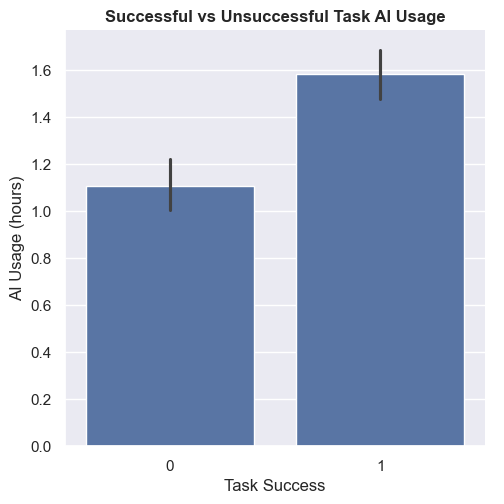

In [12]:
plot = sns.catplot(data=ai_dev_df, x='Task Success', y='AI Usage Hours', kind='bar')
plot.set_axis_labels('Task Success', 'AI Usage (hours)')
ax = plot.facet_axis(0, 0)
ax.set_title('Successful vs Unsuccessful Task AI Usage', weight='bold')

Text(0.5, 1.0, 'AI Usage vs Sleep')

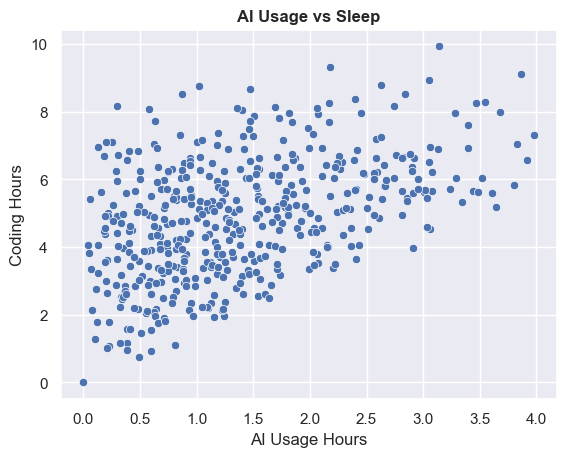

In [13]:
plot = sns.scatterplot(data=ai_dev_df, x='AI Usage Hours', y='Coding Hours')
plot.set_title('AI Usage vs Sleep', weight='bold')

Text(0.5, 1.0, 'Cognitive Load vs Sleep Hours')

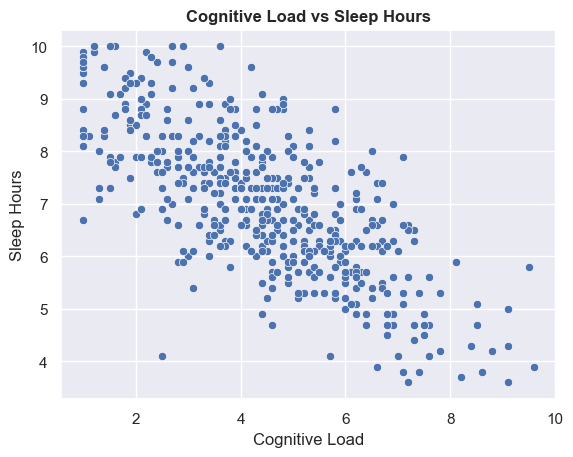

In [14]:
plot = sns.scatterplot(data=ai_dev_df, x='Cognitive Load', y='Sleep Hours')
plot.set_title('Cognitive Load vs Sleep Hours', weight='bold')

Text(0.5, 1.0, 'Coding Hours vs Coffee Intake')

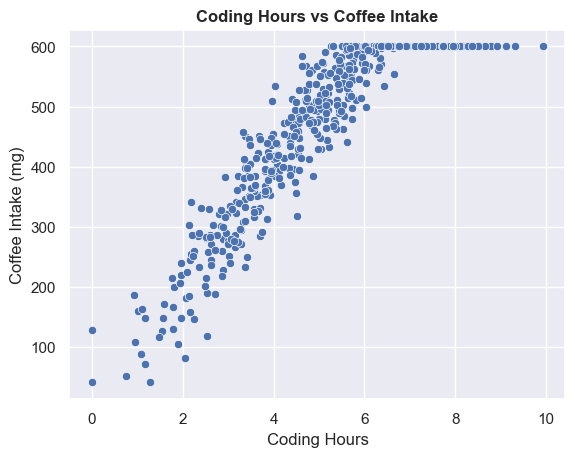

In [15]:
plot = sns.scatterplot(data=ai_dev_df, x='Coding Hours', y='Coffee Intake (mg)')
plot.set_title('Coding Hours vs Coffee Intake', weight='bold')

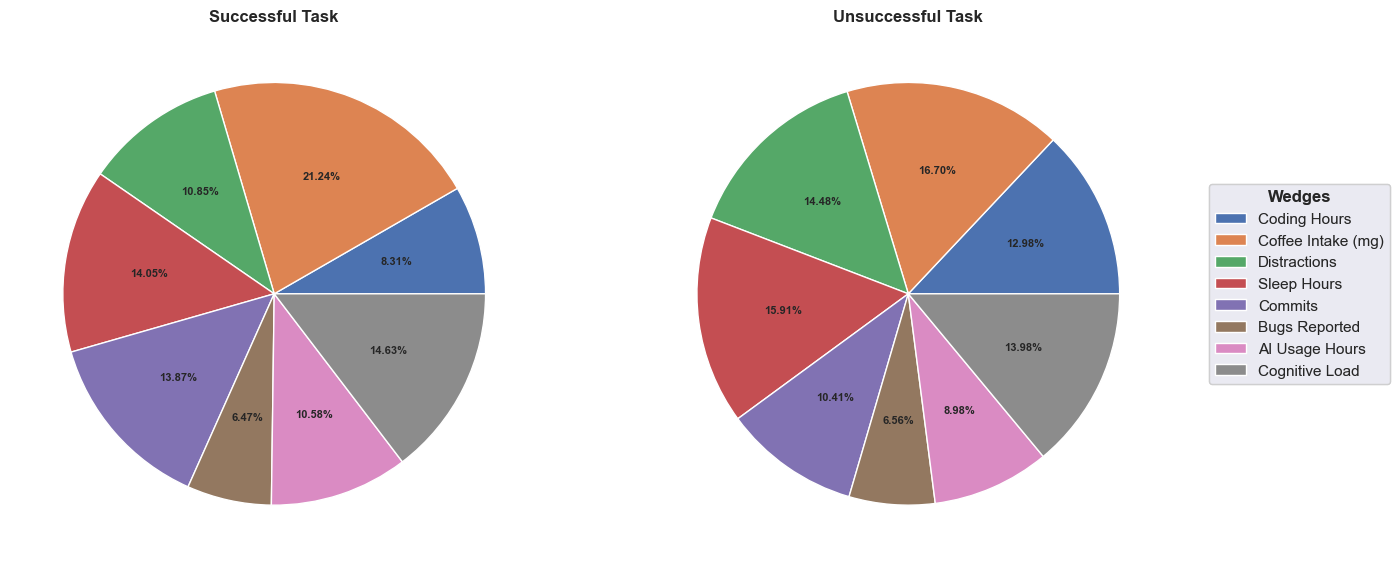

In [16]:
task_successful = ai_dev_df[ai_dev_df['Task Success'] == True].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
task_successful = task_successful.mean()
task_successful = task_successful.drop('Task Success')
task_unsuccessful = ai_dev_df[ai_dev_df['Task Success'] == False].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
task_unsuccessful = task_unsuccessful.mean()
task_unsuccessful = task_unsuccessful.drop('Task Success')

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 20))
titles = ['Successful Task', 'Unsuccessful Task']

def make_legend(wedges):
    fig.legend(wedges, task_successful.index.to_list(), title='Wedges', title_fontproperties={'weight': 'bold'}, loc='center right', bbox_to_anchor=(1.05, 0.5))

for ax, title, df in zip([ax1, ax2], titles, [task_successful, task_unsuccessful]):
    wedges, texts, autotexts= ax.pie(df.values, autopct=lambda pct: f'{pct:.2f}%')
    ax.set_title(title, weight='bold')
    make_legend(wedges)
    plt.setp(autotexts, size=8, weight='bold')

,Coding Hours,Coffee Intake (mg),Distractions,Sleep Hours,Commits,Bugs Reported,AI Usage Hours,Cognitive Load,Task Success
Coding Hours,1.000000,0.911201,-0.054416,-0.033590,0.590668,0.074733,0.474672,0.029697,0.680119
Coffee Intake (mg),0.911201,1.000000,-0.057204,-0.062957,0.540309,0.069789,0.442527,0.048906,0.716229
Distractions,-0.054416,-0.057204,1.000000,0.045665,-0.096583,-0.018945,0.000372,0.386442,-0.111528
Sleep Hours,-0.033590,-0.062957,0.045665,1.000000,-0.060029,-0.340090,-0.079336,-0.725868,0.129051
Commits,0.590668,0.540309,-0.096583,-0.060029,1.000000,0.038556,0.284920,0.057310,0.364032
Bugs Reported,0.074733,0.069789,-0.018945,-0.340090,0.038556,1.000000,0.159440,0.242592,-0.141374
AI Usage Hours,0.474672,0.442527,0.000372,-0.079336,0.284920,0.159440,1.000000,0.105102,0.259901
Cognitive Load,0.029697,0.048906,0.386442,-0.725868,0.057310,0.242592,0.105102,1.000000,-0.158134
Task Success,0.680119,0.716229,-0.111528,0.129051,0.364032,-0.141374,0.259901,-0.158134,1.000000


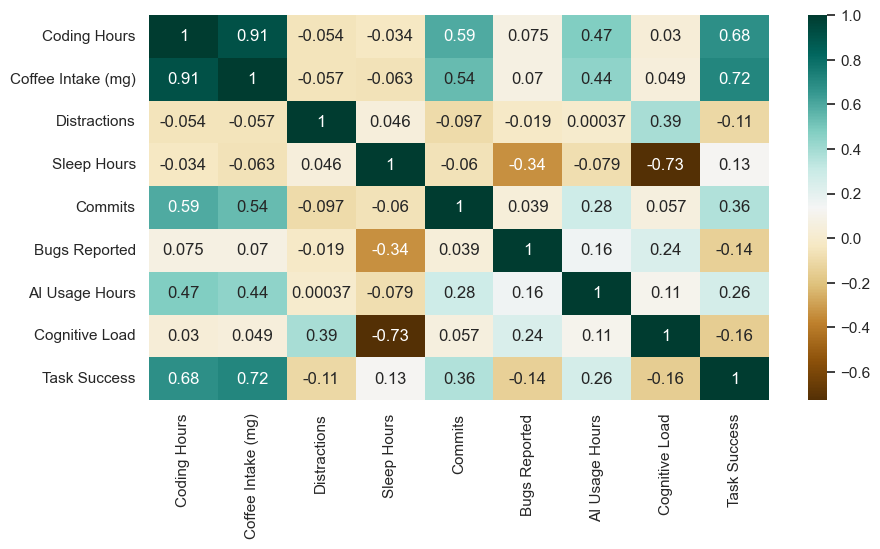

In [17]:
plt.figure(figsize=(10,5))
corr_matrix = ai_dev_df.corr()
sns.heatmap(corr_matrix, cmap='BrBG', annot=True)
corr_matrix